# Data Cleaning and Exploratory Data Analysis

## Setup - Load Libraries and Data

In [19]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [2]:
# Load data
ames_raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0)

## Examine Data

In [3]:
# Shape of the dataset
ames_raw.shape

(2580, 81)

In [4]:
# Datatypes, missing values, etc.
ames_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [5]:
# First few rows
ames_raw.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [6]:
# Categorize columns by data type
numeric_cols = ames_raw.select_dtypes(include=[np.number]).columns
categorical_cols = ames_raw.select_dtypes(include=[object]).columns

# Check by summing number of numeric and categorical columns
print(len(numeric_cols) + len(categorical_cols) == ames_raw.shape[1])

True


In [7]:
# Print the numeric columns
print(numeric_cols)

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


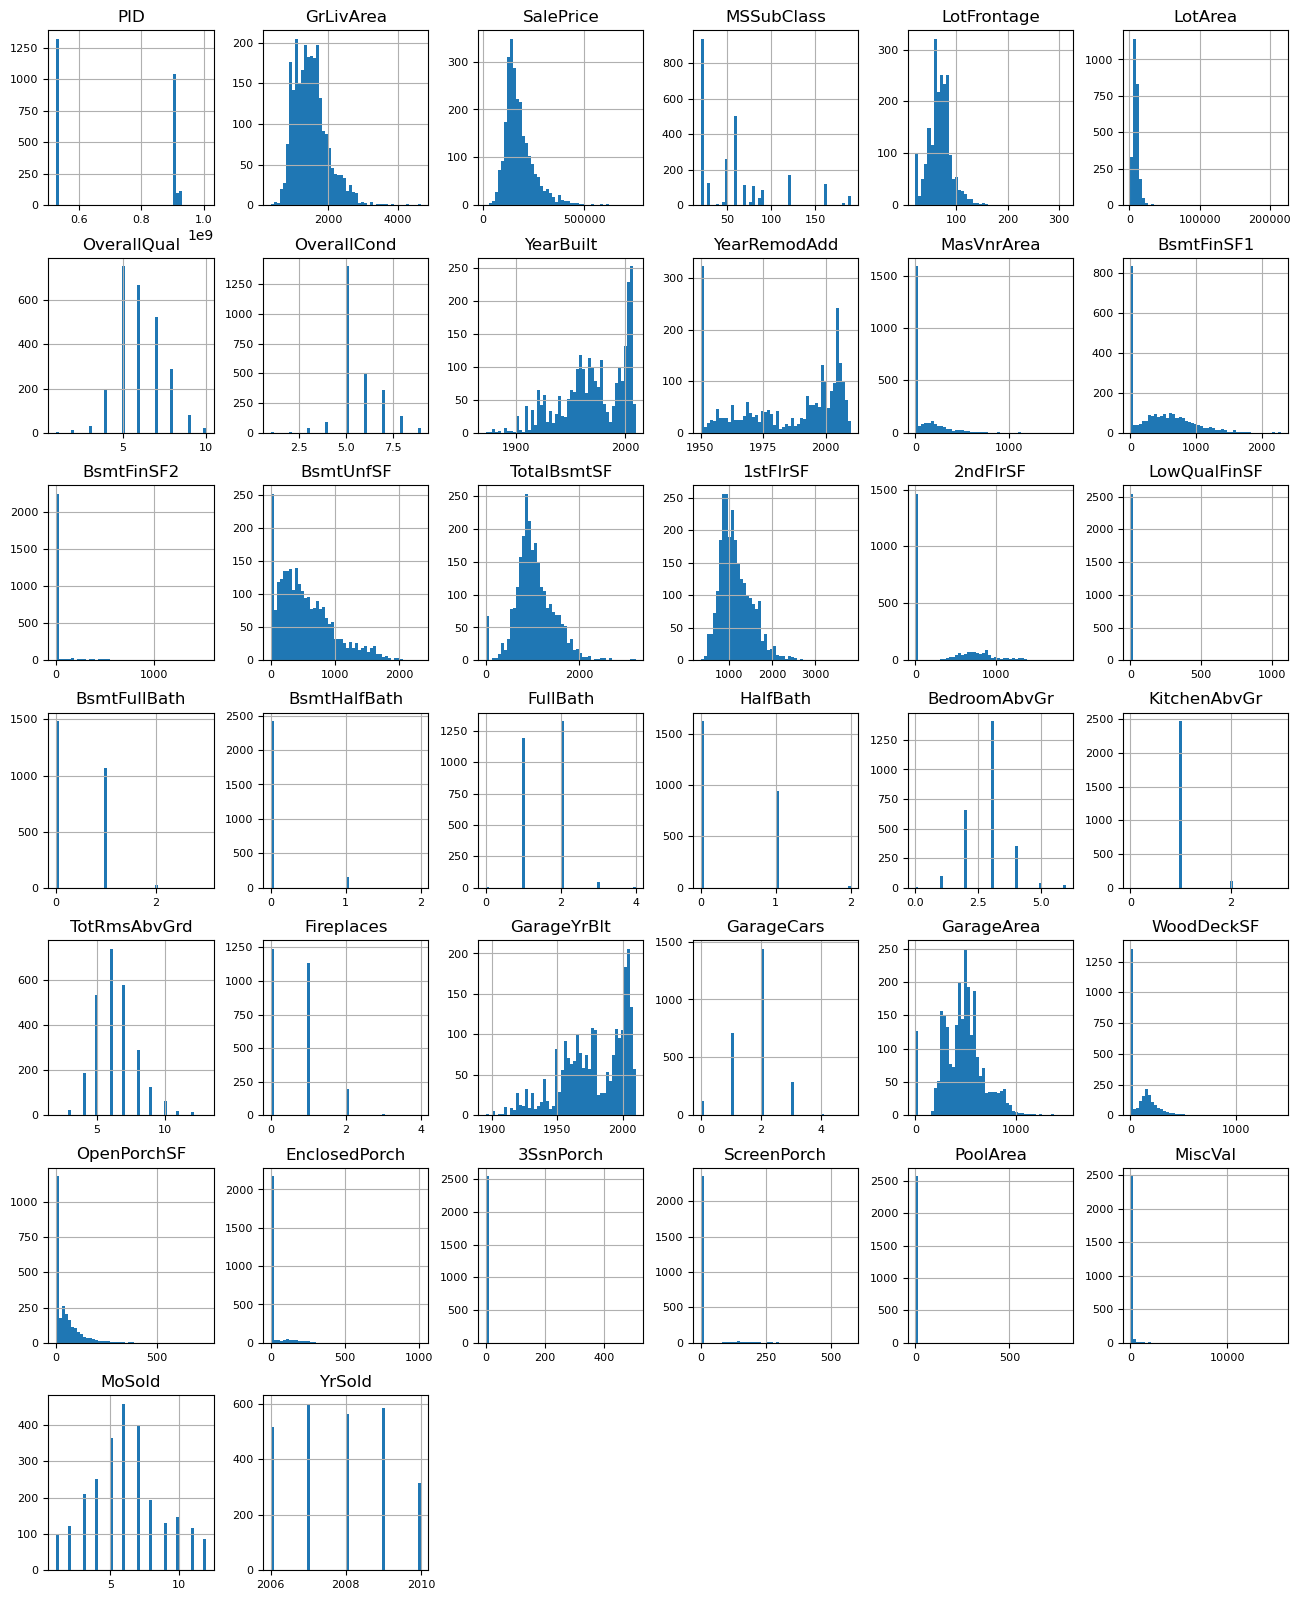

In [8]:
# Plot hists of numeric columns
ames_raw[numeric_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

One of the issues we see here is that some of these numeric categories are really ordinal categorical columns

In [9]:
# Print the categorical columns
print(categorical_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
# Get count of values for each categorical column
for col in categorical_cols:
    print(col)
    print(ames_raw[col].value_counts())
    print()
    

MSZoning
RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Street
Pave    2570
Grvl      10
Name: Street, dtype: int64

Alley
Grvl    105
Pave     63
Name: Alley, dtype: int64

LotShape
Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64

LandContour
Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64

Utilities
AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

LotConfig
Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64

LandSlope
Gtl    2458
Mod     109
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42

In [11]:
# Check for duplicate rows
ames_raw.duplicated().sum()

1

In [12]:
# Check for missing values
missing_values = ames_raw.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      462
Alley           2412
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64


## Data Cleaning

In [13]:
# Create a copy
ames_clean = ames_raw.copy()

In [14]:
# Remove duplicates
ames_clean.drop_duplicates(inplace=True)
ames_clean.shape

(2579, 81)

In [15]:
# Drop the PID column
ames_clean.drop('PID', axis=1, inplace=True)
ames_clean.shape

(2579, 80)

In [16]:
# Reset the index
ames_clean.reset_index(drop=True, inplace=True)

In [17]:
# Replace missing values for numerics and ordinal categoricals
ames_clean['LotFrontage'].fillna(0, inplace=True)
ames_clean['MasVnrArea'].fillna(0, inplace=True)
ames_clean['BsmtFinSF1'].fillna(0, inplace=True)
ames_clean['BsmtFinSF2'].fillna(0, inplace=True)
ames_clean['BsmtUnfSF'].fillna(0, inplace=True)
ames_clean['TotalBsmtSF'].fillna(0, inplace=True)
ames_clean['BsmtFullBath'].fillna(0, inplace=True)
ames_clean['BsmtHalfBath'].fillna(0, inplace=True)
ames_clean['GarageYrBlt'].fillna(0, inplace=True) # 0 means no garage
ames_clean['GarageCars'].fillna(0, inplace=True)
ames_clean['GarageArea'].fillna(0, inplace=True)

# Replace missing values for nominative categoricals
ames_clean['Alley'].fillna('None', inplace=True)
ames_clean['MasVnrType'].fillna('None', inplace=True)
ames_clean['BsmtQual'].fillna('None', inplace=True)
ames_clean['BsmtCond'].fillna('None', inplace=True)
ames_clean['BsmtExposure'].fillna('None', inplace=True)
ames_clean['BsmtFinType1'].fillna('None', inplace=True)
ames_clean['BsmtFinType2'].fillna('None', inplace=True)
ames_clean['Electrical'].fillna('None', inplace=True)
ames_clean['FireplaceQu'].fillna('None', inplace=True)
ames_clean['GarageType'].fillna('None', inplace=True)
ames_clean['GarageFinish'].fillna('None', inplace=True)
ames_clean['GarageQual'].fillna('None', inplace=True)
ames_clean['GarageCond'].fillna('None', inplace=True)
ames_clean['PoolQC'].fillna('None', inplace=True)
ames_clean['Fence'].fillna('None', inplace=True)
ames_clean['MiscFeature'].fillna('None', inplace=True)

# Check for missing values
print(ames_clean.isnull().sum().any())

False


## Exploratory Data Analysis

We will rely upon domain expertise to do some initial EDA

See:  https://www.opendoor.com/articles/factors-that-influence-home-value

This article lists several features that "conventional wisdom" deems important in determining a home's value:
1. Location
2. Home size and usable space
3. Age and condition
4. Upgrades and updates
5. The local market
6. Economic indicators
7. Interest rates

Let's examine some proxy variables.

In [21]:
# Split the independent variables and the target
predictors = ames_clean.drop('SalePrice', axis=1)
target = ames_clean['SalePrice']

In [20]:
# Create linear regression object
lr = LinearRegression()

#### Neighborhood : Physical locations within Ames city limits

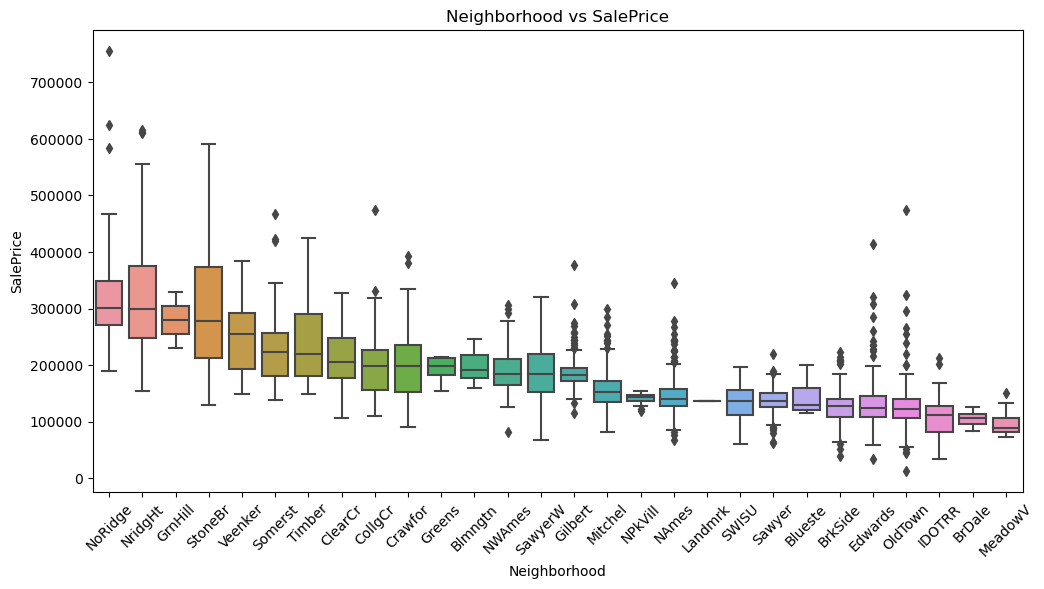

In [24]:
# Calculate median SalePrice for each Neighborhood
median_order = ames_clean.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending=False).index

# Create a box plot of SalePrice for each neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=ames_clean, order=median_order)

# Label the plot
plt.title('Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Condition1 : Proximity to various conditions

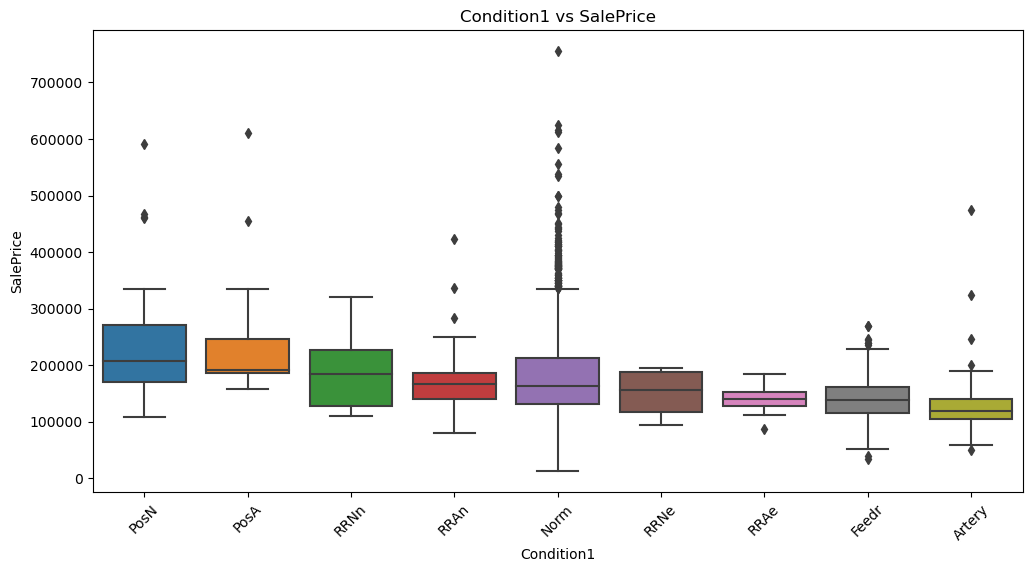

In [25]:
# Calculate median SalePrice for Condition1
median_order = ames_clean.groupby(['Condition1'])['SalePrice'].median().sort_values(ascending=False).index

# Create a box plot of SalePrice for each neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition1', y='SalePrice', data=ames_clean, order=median_order)

# Label the plot
plt.title('Condition1 vs SalePrice')
plt.xlabel('Condition1')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### LotArea : Lot size in square feet

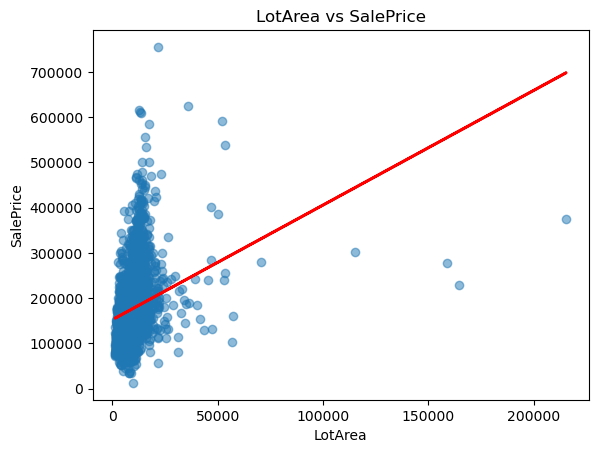

R^2 = 0.07531013997565805


In [26]:
# Plot and score LotArea

# Fit the model
lr.fit(predictors[['LotArea']], target)

# Create scatter plot
plt.scatter(predictors['LotArea'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['LotArea'], lr.predict(predictors[['LotArea']]), color='red', linewidth=2)

# Label the plot
plt.title('LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['LotArea']], target)}")

#### GrLivArea : Above grade (ground) living area square feet

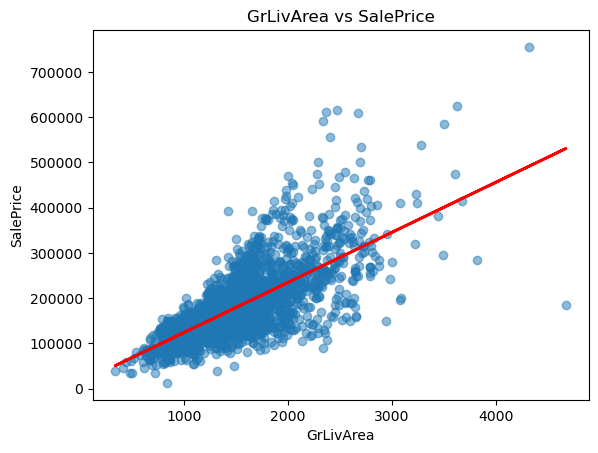

R^2 = 0.5183711142112821


In [27]:
# Plot and score GrLivArea

# Fit the model
lr.fit(predictors[['GrLivArea']], target)

# Create scatter plot
plt.scatter(predictors['GrLivArea'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['GrLivArea'], lr.predict(predictors[['GrLivArea']]), color='red', linewidth=2)

# Label the plot
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['GrLivArea']], target)}")

#### TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)

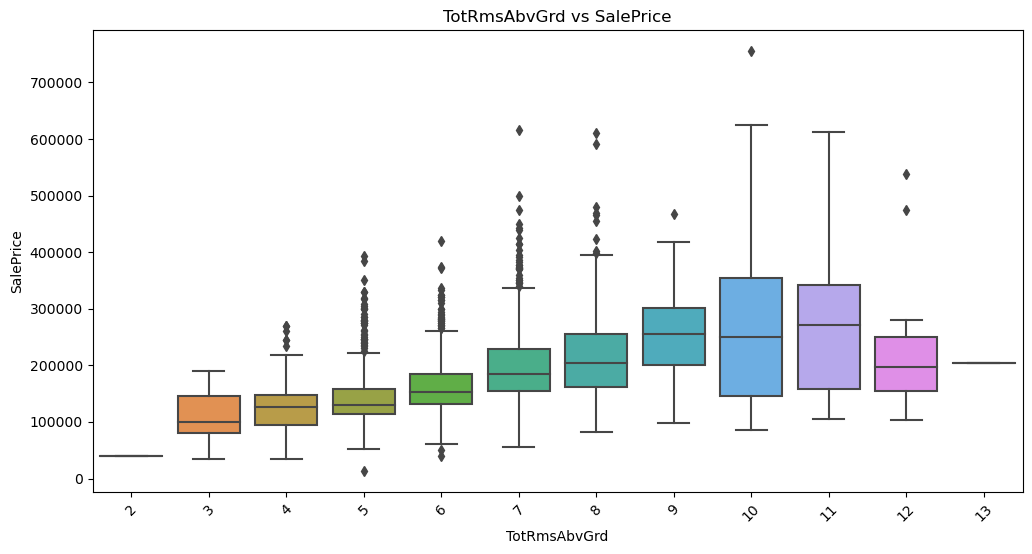

In [28]:
# Create a box plot of SalePrice vs. TotRmsAbvGrd
plt.figure(figsize=(12, 6))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=ames_clean)

# Label the plot
plt.title('TotRmsAbvGrd vs SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [29]:
# Fit the model
lr.fit(predictors[['TotRmsAbvGrd']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['TotRmsAbvGrd']], target)}")

R^2 = 0.24030189701253812


#### YearBuilt: Original construction date

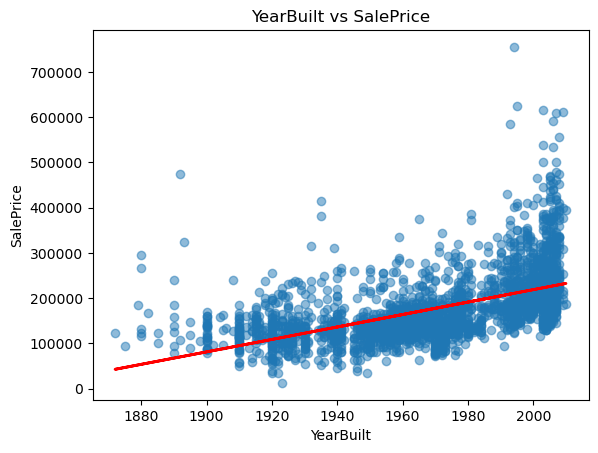

R^2 = 0.2965550613346396


In [31]:
# Plot and score YearBuilt

# Fit the model
lr.fit(predictors[['YearBuilt']], target)

# Create scatter plot
plt.scatter(predictors['YearBuilt'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['YearBuilt'], lr.predict(predictors[['YearBuilt']]), color='red', linewidth=2)

# Label the plot
plt.title('YearBuilt vs SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['YearBuilt']], target)}")

#### YearRemodAdd : Remodel date (same as construction date if no remodeling or additions)

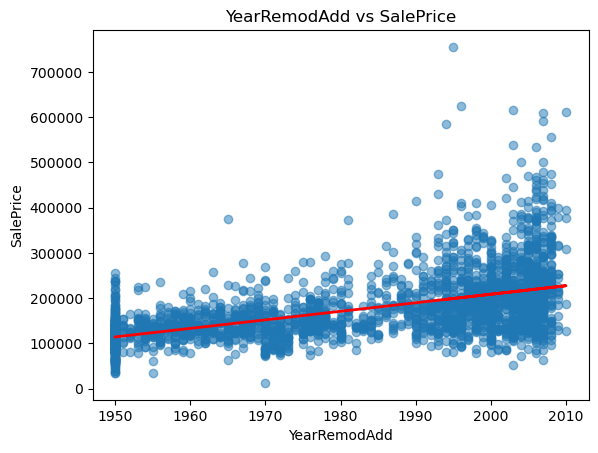

R^2 = 0.2649366345406384


In [32]:
# Plot and score YearRemodAdd

# Fit the model
lr.fit(predictors[['YearRemodAdd']], target)

# Create scatter plot
plt.scatter(predictors['YearRemodAdd'], target, alpha=0.5)

# Plot the regression line
plt.plot(predictors['YearRemodAdd'], lr.predict(predictors[['YearRemodAdd']]), color='red', linewidth=2)

# Label the plot
plt.title('YearRemodAdd vs SalePrice')
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')

# Show the plot
plt.show()

# Show scores
print(f"R^2 = {lr.score(predictors[['YearRemodAdd']], target)}")

#### OverallQual : Rates the overall material and finish of the house

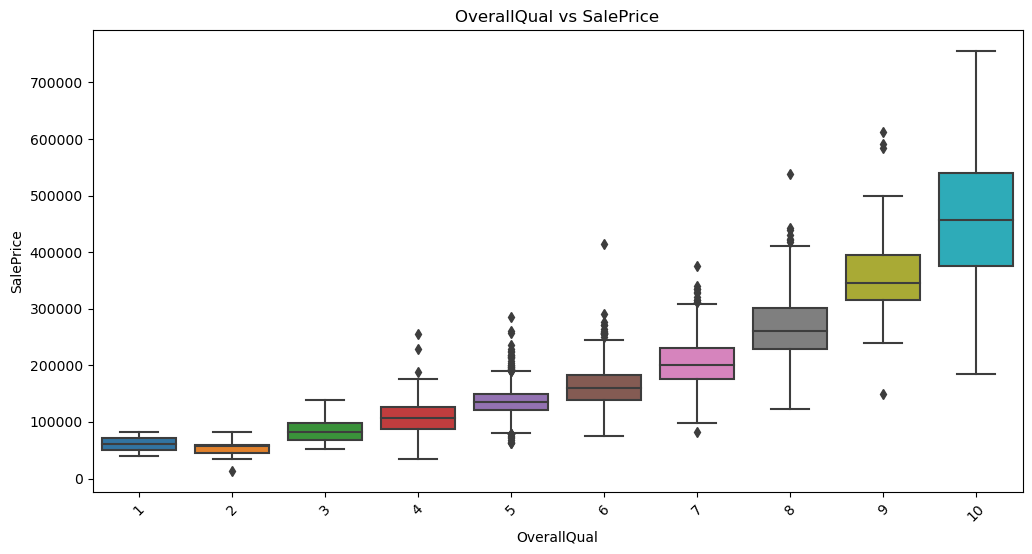

In [33]:
# Create a box plot of SalePrice vs. OverallQual
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=ames_clean)

# Label the plot
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [34]:
# Fit the model
lr.fit(predictors[['OverallQual']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['OverallQual']], target)}")

R^2 = 0.6251450369427116


#### OverallCond : Rates the overall condition of the house

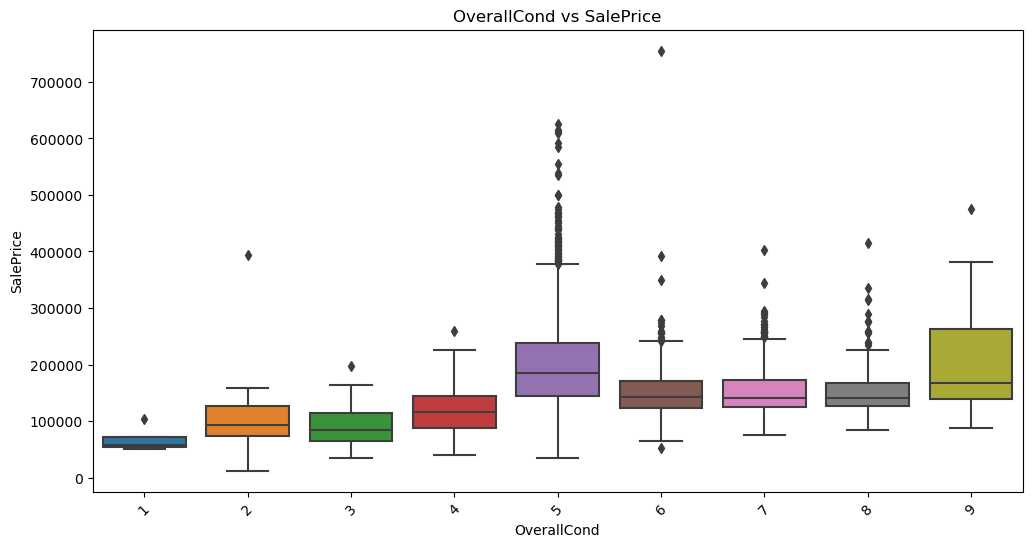

In [35]:
# Create a box plot of SalePrice vs. OverallCond
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=ames_clean)

# Label the plot
plt.title('OverallCond vs SalePrice')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [36]:
# Fit the model
lr.fit(predictors[['OverallCond']], target)

# Show the R^2 score
print(f"R^2 = {lr.score(predictors[['OverallCond']], target)}")

R^2 = 0.010225789793399054


## Save Clean Data

In [37]:
# Check cleaned dataframe
print(ames_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2579 non-null   int64  
 1   SalePrice      2579 non-null   int64  
 2   MSSubClass     2579 non-null   int64  
 3   MSZoning       2579 non-null   object 
 4   LotFrontage    2579 non-null   float64
 5   LotArea        2579 non-null   int64  
 6   Street         2579 non-null   object 
 7   Alley          2579 non-null   object 
 8   LotShape       2579 non-null   object 
 9   LandContour    2579 non-null   object 
 10  Utilities      2579 non-null   object 
 11  LotConfig      2579 non-null   object 
 12  LandSlope      2579 non-null   object 
 13  Neighborhood   2579 non-null   object 
 14  Condition1     2579 non-null   object 
 15  Condition2     2579 non-null   object 
 16  BldgType       2579 non-null   object 
 17  HouseStyle     2579 non-null   object 
 18  OverallQ

In [38]:
# Output files
ames_clean.to_csv('data/Ames_Housing_Price_Data_clean.csv', index=False)

---

## Feature Engineering 1

In [145]:
# Create new dataframe to hold engineered features
ames_engineered = ames_clean.copy()

#### Neighborhood

In [147]:
# Calculate median prices for each neighborhood
median_prices = ames_engineered.groupby('Neighborhood')['SalePrice'].median()

# Create a ranking of neighborhoods based on median prices (1 = most expensive)
neighborhood_rank = median_prices.rank(ascending=False)

# Add new 'NeighborhoodCostIndex' column to the DataFrame
ames_engineered['NeighborhoodCostIndex'] = ames_engineered['Neighborhood'].map(neighborhood_rank)

In [148]:
# Drop 'Neighborhood' column
ames_engineered = ames_engineered.drop('Neighborhood', axis=1)

#### Economic Proxy Features

Since all the house sales happened in Ames, we might think that we have effectively controlled for these variables.  HOWEVER there is an important caveat: during the timeframe of the dataset (2006-2010), the US experienced the worst housing crisis in the post-Depression era.

We will engineer a simple feature 'Crisis':
- If the date of sale is prior to 1 June 2007, crisis = 0
- If the date of sale is after this date, crisis = 1

The cut-off date was picked somewhat arbitrarily, but is rooted in the collapse of two of Bear Stearns' mortgage debt hedge funds in the month of June 2007 (see: https://www.wsj.com/articles/SB118230204193441422).  In retrospect, risks had been building in the housing market for some time before then, but the collapse of these funds is seen as a key event (see: https://www.cfr.org/timeline/us-financial-crisis).  The Case-Shiller National Home Price Index (see https://fred.stlouisfed.org/series/CSUSHPINSA) also seems to roughly confirm this timeline.

In [153]:
# Combine YrSold and MoSold into a new series
series_date_sold = pd.to_datetime(ames_engineered.YrSold.astype(str) + '-' + ames_engineered.MoSold.astype(str))

# Set the cutoff date
crisis_date = pd.to_datetime('2007-07')

# Create the 'Crisis' feature
after_crisis = (series_date_sold > crisis_date).astype(int)
ames_engineered['Crisis'] = after_crisis

In [154]:
# Check the 'Crisis' feature
print(ames_engineered['Crisis'].value_counts())

1    1648
0     931
Name: Crisis, dtype: int64


## Feature Engineering 2

In [165]:
ames_engineered_2 = ames_engineered.copy()

#### Basement Features

In [166]:
# Create new basement features
ames_engineered_2['TotalFinSF1pct'] = ames_engineered_2['BsmtFinSF1'] / ames_engineered_2['TotalBsmtSF']

## Dummify Nominative Categorical Variables

In [156]:
# Create a new dataframe to hold encoded features
ames_encoded = ames_engineered.copy()

In [157]:
# Create a list of nominative categorical features
nominative_features = ['MSZoning', 
                    'Street', 
                    'Alley', 
                    'LotShape',
                    'LandContour',
                    'Utilities',
                    'LotConfig',
                    'LandSlope',
                    'Condition1',
                    'Condition2',
                    'BldgType',
                    'HouseStyle',
                    'RoofStyle',
                    'RoofMatl',
                    'Exterior1st',
                    'Exterior2nd',
                    'MasVnrType',
                    'ExterQual',
                    'ExterCond',
                    'Foundation',
                    'BsmtQual',
                    'BsmtCond',
                    'BsmtExposure',
                    'BsmtFinType1',
                    'BsmtFinType2',
                    'Heating',
                    'HeatingQC',
                    'CentralAir',
                    'Electrical',
                    'KitchenQual',
                    'Functional',
                    'FireplaceQu',
                    'GarageType',
                    'GarageFinish',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive',
                    'PoolQC',
                    'Fence',
                    'MiscFeature',
                    'SaleType',
                    'SaleCondition']                    

In [158]:
# Create a list of all non-nominative features
non_nominative_features = [feature for feature in ames_encoded.columns if feature not in nominative_features]
non_nominative_features.remove('SalePrice')
non_nominative_features

['GrLivArea',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'NeighborhoodCostIndex',
 'YearsSinceBuilt',
 'YearsSinceRemod',
 'Crisis']

In [159]:
# One-hot encode the features in nominal_features
encoded_categoricals = pd.get_dummies(ames_encoded[nominative_features], drop_first=True)

# Concatenate encoded features with original dataframe
ames_encoded = pd.concat([ames_encoded, encoded_categoricals], axis=1)

# Drop the original nominal_features columns
ames_encoded = ames_encoded.drop(nominative_features, axis=1)

In [160]:
# Check there are no more nominative features
ames_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 244 entries, GrLivArea to SaleCondition_Partial
dtypes: float64(12), int64(27), uint8(205)
memory usage: 1.3 MB


## Save Clean Data with Engineered Features

In [161]:
# Check cleaned dataframe
print(ames_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2579 non-null   int64  
 1   SalePrice      2579 non-null   int64  
 2   MSSubClass     2579 non-null   int64  
 3   MSZoning       2579 non-null   object 
 4   LotFrontage    2579 non-null   float64
 5   LotArea        2579 non-null   int64  
 6   Street         2579 non-null   object 
 7   Alley          2579 non-null   object 
 8   LotShape       2579 non-null   object 
 9   LandContour    2579 non-null   object 
 10  Utilities      2579 non-null   object 
 11  LotConfig      2579 non-null   object 
 12  LandSlope      2579 non-null   object 
 13  Neighborhood   2579 non-null   object 
 14  Condition1     2579 non-null   object 
 15  Condition2     2579 non-null   object 
 16  BldgType       2579 non-null   object 
 17  HouseStyle     2579 non-null   object 
 18  OverallQ

In [162]:
# Check engineered dataframe
print(ames_engineered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GrLivArea              2579 non-null   int64  
 1   SalePrice              2579 non-null   int64  
 2   MSSubClass             2579 non-null   int64  
 3   MSZoning               2579 non-null   object 
 4   LotFrontage            2579 non-null   float64
 5   LotArea                2579 non-null   int64  
 6   Street                 2579 non-null   object 
 7   Alley                  2579 non-null   object 
 8   LotShape               2579 non-null   object 
 9   LandContour            2579 non-null   object 
 10  Utilities              2579 non-null   object 
 11  LotConfig              2579 non-null   object 
 12  LandSlope              2579 non-null   object 
 13  Condition1             2579 non-null   object 
 14  Condition2             2579 non-null   object 
 15  Bldg

In [163]:
# Check encoded dataframe
print(ames_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 244 entries, GrLivArea to SaleCondition_Partial
dtypes: float64(12), int64(27), uint8(205)
memory usage: 1.3 MB
None


In [164]:
# Output files
ames_clean.to_csv('data/Ames_Housing_Price_Data_clean.csv', index=False)
ames_engineered.to_csv('data/Ames_Housing_Price_Data_engineered.csv', index=False)
ames_encoded.to_csv('data/Ames_Housing_Price_Data_encoded.csv', index=False)